### Thallys Oliveira - 11819827

Questão 2 - Lista 4

In [5]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora.tif", "abobora.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.transform import hough_circle, hough_circle_peaks

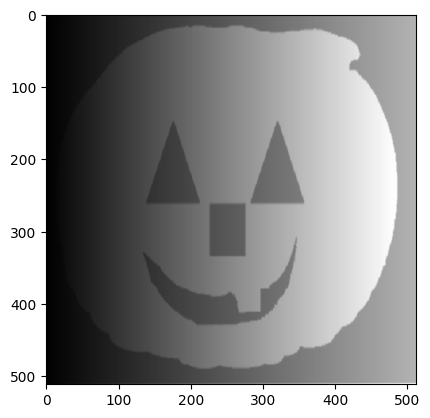

In [7]:
# Lendo a Imagem

img = cv.imread('abobora.tif',0)

plt.imshow(img, cmap='gray')

In [8]:
#Pegar tamanho da imagem
(m,n) = img.shape
print(img.shape)

(512, 512)


In [9]:
#Aplicação do método de otsu
ret, th = cv.threshold(img, 0,255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

In [10]:
#Função para realizar a subdivisão das imagens de forma geral
def subdivideImg(img,sub):
  imgRecovered = np.zeros(img.shape, np.uint8)
  xmin = 0
  xmax = int(img.shape[1]/sub)
  for i in range (sub):
    SubImage = img[:,xmin:xmax]
    #Aplicação do metodo de otsu
    ret, th = cv.threshold(SubImage, 0,255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    imgRecovered[:,xmin:xmax] = th
    xmin = xmax
    xmax = xmax + int(img.shape[1]/sub)
  
  return imgRecovered


#Aplicação do método de otsu nas sub divisões da imagem
otsu1 = subdivideImg(img,8)
otsu2 = subdivideImg(img,32)
otsu3 = subdivideImg(img,256)


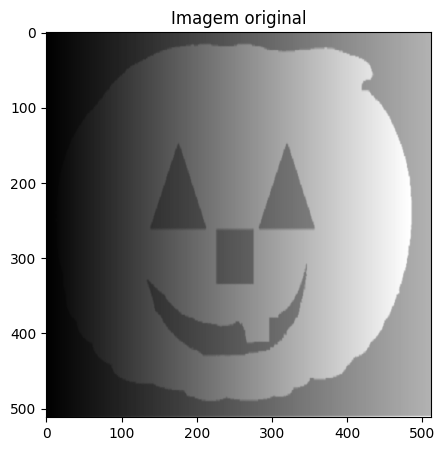

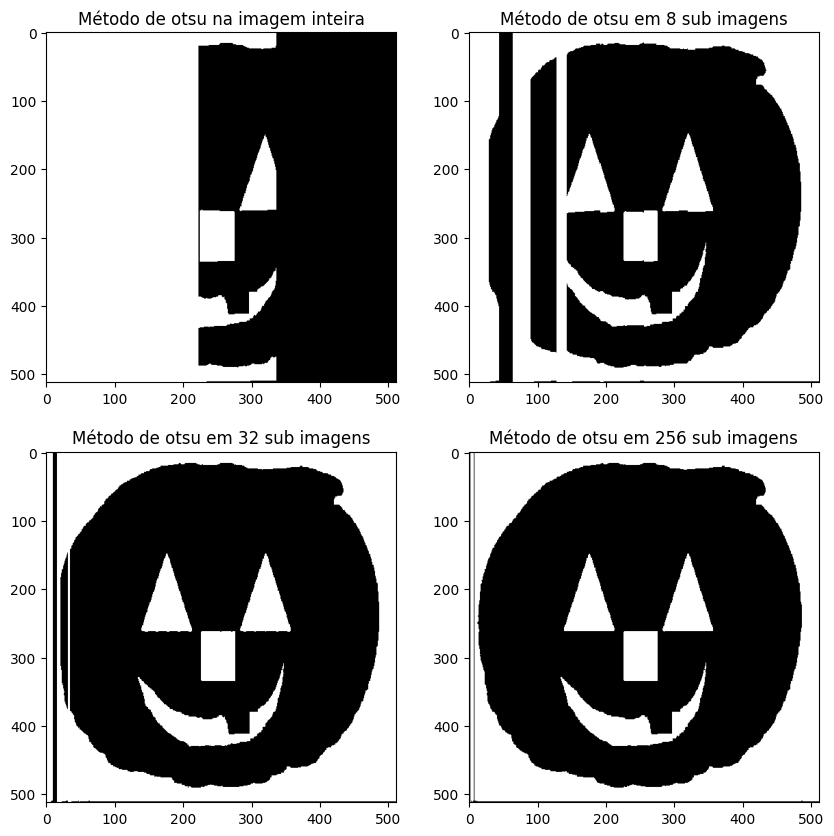

In [11]:
#Resultados
plt.figure(figsize = (5,5))
plt.imshow(img, cmap = "gray")
plt.title("Imagem original")

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(th, cmap = "gray")
plt.title("Método de otsu na imagem inteira")

plt.subplot(2,2,2)
plt.imshow(otsu1, cmap = "gray")
plt.title("Método de otsu em 8 sub imagens")

plt.subplot(2,2,3)
plt.imshow(otsu2, cmap = "gray")
plt.title("Método de otsu em 32 sub imagens")

plt.subplot(2,2,4)
plt.imshow(otsu3, cmap = "gray")
plt.title("Método de otsu em 256 sub imagens")

plt.show()